In [1]:
from pathlib import Path
from sqlalchemy import create_engine
import sqlite3
import pandas as pd

Path('countries.db').touch()
conn = sqlite3.connect('countries.db')
c = conn.cursor()
c.execute('''CREATE TABLE cities (name VARCHAR PRIMARY KEY,
                          country_code VARCHAR,
                          city_proper_pop REAL,
                          metroarea_pop REAL,
                          urbanarea_pop REAL);''')
c.execute('''CREATE TABLE countries (code VARCHAR PRIMARY KEY,
                                     country_name VARCHAR,
                                     continent VARCHAR,
                                     region VARCHAR,
                                     surface_area REAL,
                                     indep_year INTEGER,
                                     local_name VARCHAR,
                                     gov_form VARCHAR,
                                     capital VARCHAR,
                                     cap_long REAL,
                                     cap_lat REAL);''')
c.execute('''CREATE TABLE languages (lang_id INTEGER PRIMARY KEY,
                                     code VARCHAR,
                                     name VARCHAR,
                                     percent REAL,
                                     official BOOLEAN); ''')
c.execute('''CREATE TABLE economies (econ_id INTEGER PRIMARY KEY,
                                     code VARCHAR,
                                     year INTEGER,
                                     income_group VARCHAR,
                                     gdp_percapita REAL,
                                     gross_savings REAL,
                                     inflation_rate REAL,
                                     total_investment REAL,
                                     unemployment_rate REAL,
                                     exports REAL,
                                     imports REAL)''')
c.execute('''CREATE TABLE currencies (curr_id INTEGER PRIMARY KEY,
                                      code VARCHAR,
                                      basic_unit VARCHAR,
                                      curr_code VARCHAR,
                                      frac_unit VARCHAR,
                                      frac_perbasic REAL);''')
c.execute('''CREATE TABLE populations (pop_id INTEGER PRIMARY KEY,
                                       country_code VARCHAR,
                                       year INTEGER,
                                       fertility_rate REAL,
                                       life_expectancy REAL,
                                       size REAL);''')
c.execute('''CREATE TABLE countries_plus (name VARCHAR,
                                          continent VARCHAR,
                                          code VARCHAR PRIMARY KEY,
                                          surface_area REAL,
                                          geosize_group VARCHAR);''')
c.execute('''CREATE TABLE economies2010 (code VARCHAR PRIMARY KEY,
                                         year INTEGER,
                                         income_group VARCHAR,
                                         gross_savings REAL);''')
c.execute('''CREATE TABLE economies2015 (code VARCHAR PRIMARY KEY,
                                         year INTEGER,
                                         income_group VARCHAR,
                                         gross_savings REAL);''')

files = ["cities.csv", "currencies.csv", "economies2015.csv", "populations.csv", "countries.csv",	"economies.csv", "countries_plus.csv",  "economies2010.csv", "languages.csv"]
tables =["cities", "currencies", "economies2015", "populations", "countries",	"economies", "countries_plus",  "economies2010", "languages"]
for file, name in zip(files, tables):
    df = pd.read_csv(file)
    df.to_sql(name, conn, if_exists='append', index = False)

engine = create_engine("sqlite:///countries.db")
engine.table_names()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)


['cities',
 'countries',
 'countries_plus',
 'currencies',
 'economies',
 'economies2010',
 'economies2015',
 'languages',
 'populations']

In [7]:
Path('diagrams.db').touch()
conn = sqlite3.connect('diagrams.db')
c = conn.cursor()
c.execute('''CREATE TABLE left_table (id INTEGER PRIMARY KEY,
                                      val CHARACTER(2));''')
c.execute('''CREATE TABLE right_table (id INTEGER PRIMARY KEY,
                                       val CHARACTER(2));''')
c.execute('''CREATE TABLE left_one (id INTEGER PRIMARY KEY);''')
c.execute('''CREATE TABLE right_one (id INTEGER PRIMARY KEY);''')
c.execute('''CREATE TABLE right2 (id INTEGER,
                                  val CHARACTER(2) PRIMARY KEY);''')
c.execute('''CREATE TABLE table1 (id INTEGER PRIMARY KEY);''')
c.execute('''CREATE TABLE table2 (id CHARACTER(1) PRIMARY KEY);''')

files = ["left_table.csv", "right_one.csv", "table2.csv", "left_one.csv",  "right2.csv", "right_table.csv",  "table1.csv"]
tables =["left_table", "right_one", "table2", "left_one",  "right2", "right_table",  "table1"]
for file, name in zip(files, tables):
    df = pd.read_csv(file)
    df.to_sql(name, conn, if_exists='append', index = False)

engine = create_engine("sqlite:///diagrams.db")
engine.table_names()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)


['left_one',
 'left_table',
 'right2',
 'right_one',
 'right_table',
 'table1',
 'table2']

In [10]:
Path('leaders.db').touch()
conn = sqlite3.connect('leaders.db')
c = conn.cursor()
c.execute('''CREATE TABLE presidents (country VARCHAR PRIMARY KEY,
                                      continent VARCHAR,
                                      president VARCHAR);''')
c.execute('''CREATE TABLE prime_ministers (country VARCHAR PRIMARY KEY,
                                           continent VARCHAR,
                                           prime_minister VARCHAR);''')
c.execute('''CREATE TABLE states (name VARCHAR PRIMARY KEY,
                                  continent VARCHAR,
                                  indep_year INTEGER,
                                  fert_rate REAL,
                                  women_parli_perc REAL);''')
c.execute('''CREATE TABLE monarchs (country VARCHAR PRIMARY KEY,
                                    continent VARCHAR,
                                    monarch VARCHAR);''')

files = ["monarchs.csv", "prime_ministers.csv",  "states.csv", "presidents.csv"]
tables =["monarchs", "prime_ministers",  "states", "presidents"]
for file, name in zip(files, tables):
    df = pd.read_csv(file)
    df.to_sql(name, conn, if_exists='append', index = False)

engine = create_engine("sqlite:///leaders.db")
engine.table_names()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)


['monarchs', 'presidents', 'prime_ministers', 'states']

# **Introduction to INNER JOIN**

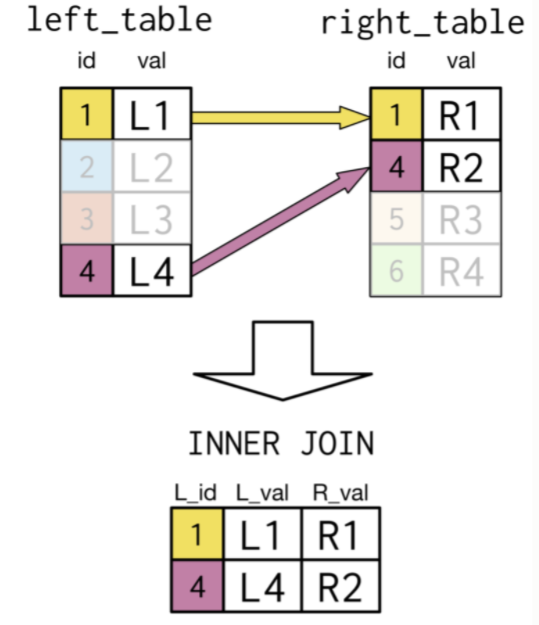



### **Inner join**



```
SELECT *
FROM left_table
INNER JOIN right_table
ON left_table.id = right_table.id;
```
* Begin by selecting all columns from the cities table.

In [4]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine("sqlite:///countries.db")
pd.read_sql_query("SELECT * FROM cities", engine).head(7)

,name,country_code,city_proper_pop,metroarea_pop,urbanarea_pop
0,Abidjan,CIV,4765000.0,NaN,4765000.0
1,Abu Dhabi,ARE,1145000.0,NaN,1145000.0
2,Abuja,NGA,1235880.0,6000000.0,1235880.0
3,Accra,GHA,2070463.0,4010054.0,2070463.0
4,Addis Ababa,ETH,3103673.0,4567857.0,3103673.0
5,Ahmedabad,IND,5570585.0,NaN,5570585.0
6,Alexandria,EGY,4616625.0,NaN,4616625.0


* Inner join the `cities` table on the left to the `countries` table on the right, keeping all of the fields in both tables.
* You should match the tables on the `country_code` field in `cities` and the `code` field in `countries`.
* Do not alias your tables here or in the next step. Using `cities` and `countries` is fine for now.

In [5]:
pd.read_sql_query('''SELECT *
                     FROM cities
                     INNER JOIN countries ON cities.country_code = countries.code;''', engine).head()

,name,country_code,city_proper_pop,metroarea_pop,urbanarea_pop,code,country_name,continent,region,surface_area,indep_year,local_name,gov_form,capital,cap_long,cap_lat
0,Abidjan,CIV,4765000.0,NaN,4765000.0,CIV,Cote d'Ivoire,Africa,Western Africa,322463.0,1960,Cote dIvoire,Republic,Yamoussoukro,-4.03050,5.33200
1,Abu Dhabi,ARE,1145000.0,NaN,1145000.0,ARE,United Arab Emirates,Asia,Middle East,83600.0,1971,Al-Imarat al-´Arabiya al-Muttahida,Emirate Federation,Abu Dhabi,54.37050,24.47640
2,Abuja,NGA,1235880.0,6000000.0,1235880.0,NGA,Nigeria,Africa,Western Africa,923768.0,1960,Nigeria,Federal Republic,Abuja,7.48906,9.05804
3,Accra,GHA,2070463.0,4010054.0,2070463.0,GHA,Ghana,Africa,Western Africa,238533.0,1957,Ghana,Republic,Accra,-0.20795,5.57045
4,Addis Ababa,ETH,3103673.0,4567857.0,3103673.0,ETH,Ethiopia,Africa,Eastern Africa,1104300.0,-1000,YeItyop´iya,Republic,Addis Ababa,38.74680,9.02274


* Modify the `SELECT` statement to keep only the name of the city, the name of the country, and the name of the region the country resides in.
* Alias the name of the city `AS city` and the name of the country `AS country`.

In [11]:
pd.read_sql_query('''SELECT cities.name AS city,
                            countries.country_name AS country,
                            region
                     FROM cities
                     INNER JOIN countries ON cities.country_code = countries.code;''', engine).head()

,city,country,region
0,Abidjan,Cote d'Ivoire,Western Africa
1,Abu Dhabi,United Arab Emirates,Middle East
2,Abuja,Nigeria,Western Africa
3,Accra,Ghana,Western Africa
4,Addis Ababa,Ethiopia,Eastern Africa


### **Inner join (2)**
Instead of writing the full table name, you can use table aliasing as a shortcut. For tables you also use `AS` to add the alias immediately after the table name with a space. Check out the aliasing of cities and countries below.

```
SELECT c1.name AS city, c2.name AS country
FROM cities AS c1
INNER JOIN countries AS c2
ON c1.country_code = c2.code;
```




Notice that to select a field in your query that appears in multiple tables, you'll need to identify which table/table alias you're referring to by using a . in your SELECT statement.

You'll now explore a way to get data from both the `countries` and `economies` tables to examine the inflation rate for both 2010 and 2015.

* Join the tables `countries` (left) and `economies` (right) aliasing `countries AS c` and `economies AS e`.
* Specify the field to match the tables `ON`.
* From this join, `SELECT`:
  * `c.code`, aliased as `country_code`.
  * `name`, `year`, and `inflation_rate`, not aliased.

In [13]:
pd.read_sql_query('''SELECT c.code AS country_code, country_name, year, inflation_rate
                     FROM countries AS c
                     INNER JOIN economies AS e
                     ON c.code = e.code; ''', engine).head()

,country_code,country_name,year,inflation_rate
0,AFG,Afghanistan,2010,2.179
1,AFG,Afghanistan,2015,-1.549
2,AGO,Angola,2010,14.480
3,AGO,Angola,2015,10.287
4,ALB,Albania,2010,3.605


### **Inner join (3)**
The ability to combine multiple joins in a single query is a powerful feature of SQL, e.g:



```
SELECT *
FROM left_table
INNER JOIN right_table
ON left_table.id = right_table.id
INNER JOIN another_table
ON left_table.id = another_table.id;
```


As you can see here it becomes tedious to continually write long table names in joins. This is when it becomes useful to alias each table using the first letter of its name (e.g. `countries AS c`)! It is standard practice to alias in this way and, if you choose to alias tables or are asked to specifically for an exercise in this course, you should follow this protocol.

Now, for each country, you want to get the country name, its region, the fertility rate, and the unemployment rate for both 2010 and 2015.

Note that results should work throughout this course with or without table aliasing unless specified differently.

* Inner join `countries` (left) and `populations` (right) on the `code` and `country_code` fields respectively.
* Alias `countries AS c` and `populations AS p`.
* Select `code`, `name`, and `region` from `countries` and also select `year` and `fertility_rate` from `populations` (5 fields in total).

In [19]:
pd.read_sql_query('''SELECT c.code, country_name, region, year, fertility_rate
                     FROM countries AS c
                     INNER JOIN populations as p ON c.code = p.country_code; ''', engine).head()

,code,country_name,region,year,fertility_rate
0,AFG,Afghanistan,Southern and Central Asia,2015,4.653
1,AFG,Afghanistan,Southern and Central Asia,2010,5.746
2,ALB,Albania,Southern Europe,2015,1.793
3,ALB,Albania,Southern Europe,2010,1.663
4,DZA,Algeria,Northern Africa,2015,2.805


* Add an additional `INNER JOIN` with `economies` to your previous query by joining on `code`.
* Include the `unemployment_rate` column that became available through joining with `economies`.
* Note that `year` appears in both `populations` and `economies`, so you have to explicitly use `e.year` instead of year as you did before.

In [21]:
pd.read_sql_query('''SELECT c.code, country_name, region, e.year, fertility_rate, unemployment_rate
                     FROM countries AS c
                     INNER JOIN populations as p ON c.code = p.country_code
                     INNER JOIN economies as e ON c.code = e.code; ''', engine).head(10)

,code,country_name,region,year,fertility_rate,unemployment_rate
0,AFG,Afghanistan,Southern and Central Asia,2010,4.653,NaN
1,AFG,Afghanistan,Southern and Central Asia,2015,4.653,NaN
2,AFG,Afghanistan,Southern and Central Asia,2010,5.746,NaN
3,AFG,Afghanistan,Southern and Central Asia,2015,5.746,NaN
4,ALB,Albania,Southern Europe,2010,1.793,14.000
5,ALB,Albania,Southern Europe,2015,1.793,17.100
6,ALB,Albania,Southern Europe,2010,1.663,14.000
7,ALB,Albania,Southern Europe,2015,1.663,17.100
8,DZA,Algeria,Northern Africa,2010,2.805,9.961
9,DZA,Algeria,Northern Africa,2015,2.805,11.214


* Scroll down the query result and take a look at the results for `Albania` from your previous query. Does something seem off to you?
* The trouble with doing your last join on `c.code = e.code` and not also including `year` is that e.g. the 2010 value for `fertility_rate` (which one: 1.663 or 1.793?) is also paired with the 2015 value for `unemployment_rate` (17.1).
* Fix your previous query: in your last `ON` clause, use `AND` to add an additional joining condition. In addition to joining on `code` in `c` and `e`, also join on `year` in `e` and `p`.

In [22]:
pd.read_sql_query('''SELECT c.code, country_name, region, e.year, fertility_rate, unemployment_rate
                     FROM countries AS c
                     INNER JOIN populations as p ON c.code = p.country_code
                     INNER JOIN economies as e ON c.code = e.code AND e.year = p.year; ''', engine).head(10)

,code,country_name,region,year,fertility_rate,unemployment_rate
0,AFG,Afghanistan,Southern and Central Asia,2015,4.653,NaN
1,AFG,Afghanistan,Southern and Central Asia,2010,5.746,NaN
2,ALB,Albania,Southern Europe,2015,1.793,17.100
3,ALB,Albania,Southern Europe,2010,1.663,14.000
4,DZA,Algeria,Northern Africa,2015,2.805,11.214
5,DZA,Algeria,Northern Africa,2010,2.873,9.961
6,AGO,Angola,Central Africa,2015,5.996,NaN
7,AGO,Angola,Central Africa,2010,6.416,NaN
8,ATG,Antigua and Barbuda,Caribbean,2015,2.063,NaN
9,ATG,Antigua and Barbuda,Caribbean,2010,2.130,NaN


# **Inner join with using**

When joining tables with a common field name, e.g.

```
SELECT *
FROM countries
INNER JOIN economies
ON countries.code = economies.code
```


You can use `USING` as a shortcut:



```
SELECT *
FROM countries
INNER JOIN economies
USING(code)
```

You'll now explore how this can be done with the `countries` and `languages` tables.

* Inner join `countries` on the left and `languages` on the right with `USING(code)`.
* Select the fields corresponding to:
  * `country_name` AS `country`,
  * `continent` name,
  * `language` `name` AS `language`, and
  * whether or not the language is official.
  
Remember to alias your tables using the first letter of their names.

In [26]:
df = pd.read_sql_query('''SELECT country_name AS country,
                            continent,
                            l.name AS language,
                            official
                     FROM countries AS c
                     INNER JOIN languages AS l
                     USING (code)''', engine)

df.loc[df["official"] == 1, "official"] = True
df.loc[df["official"] == 0, "official"] = False
df.head()

,country,continent,language,official
0,Afghanistan,Asia,Dari,True
1,Afghanistan,Asia,Pashto,True
2,Afghanistan,Asia,Turkic,False
3,Afghanistan,Asia,Other,False
4,Albania,Europe,Albanian,True


# **SELF JOIN**

* Suppose we want to create a new table showing countries that are in the same continent matched as pairs.
* INNER JOIN will have matches if countries on the right table (which is also the same table) are in the same continent.

In [29]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///leaders.db")
pd.read_sql_query('''SELECT p1.country AS country1, 
                            p2.country AS cuontry2,
                            p1.continent
                     FROM prime_ministers AS p1
                     INNER JOIN prime_ministers AS p2 ON p1.continent = p2.continent
                     LIMIT 14;''', con=engine)

,country1,cuontry2,continent
0,Egypt,Egypt,Africa
1,Portugal,Norway,Europe
2,Portugal,Portugal,Europe
3,Portugal,Spain,Europe
4,Vietnam,Brunei,Asia
5,Vietnam,India,Asia
6,Vietnam,Oman,Asia
7,Vietnam,Vietnam,Asia
8,Haiti,Haiti,North America
9,India,Brunei,Asia


* However, we don't want the same country on the same row.
* Use `ON p1.continent = p2.continent AND p1.country <> p2.country`

In [35]:
pd.read_sql_query('''SELECT p1.country AS country1, 
                            p2.country AS cuontry2,
                            p1.continent
                     FROM prime_ministers AS p1
                     INNER JOIN prime_ministers AS p2 
                     ON p1.continent = p2.continent AND p1.country <> p2.country 
                     LIMIT 14;''', con=engine)

,country1,cuontry2,continent
0,Portugal,Norway,Europe
1,Portugal,Spain,Europe
2,Vietnam,Brunei,Asia
3,Vietnam,India,Asia
4,Vietnam,Oman,Asia
5,India,Brunei,Asia
6,India,Oman,Asia
7,India,Vietnam,Asia
8,Norway,Portugal,Europe
9,Norway,Spain,Europe


# **CASE WHEN THEN**
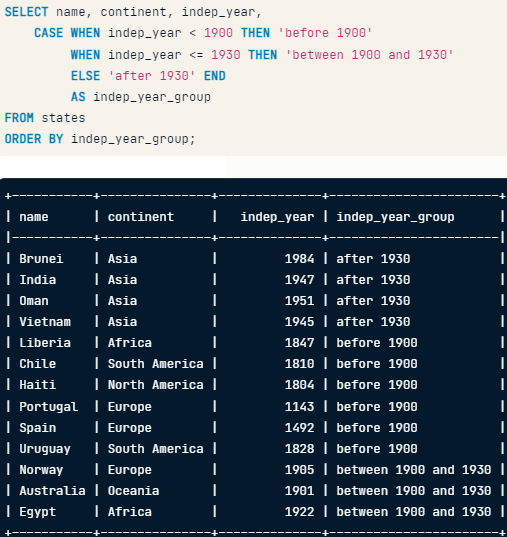

### **Self-join**

Use the `populations` table to perform a self-join to calculate the percentage increase in population from 2010 to 2015 for each country code.

Since you'll be joining the `populations` table to itself, you can alias `populations` as `p1` and also `populations` as `p2`. This is good practice whenever you are aliasing and your tables have the same first letter. Note that <ins>you are **required** to alias the tables with self-joins</ins>.

* Join `populations` with itself `ON country_code`.
* Select the `country_code` from `p1` and the `size` field from both `p1` and `p2`. SQL won't allow same-named fields, so alias `p1.size` as `size2010` and `p2.size` as `size2015`.

In [41]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///countries.db")
pd.read_sql_query('''SELECT p1.country_code AS country1, 
                            p1.size AS size2010,
                            p2.size AS size2015
                     FROM populations AS p1
                     INNER JOIN populations AS p2 USING (country_code);''', con=engine).head(9)

,country1,size2010,size2015
0,AFG,32526562.0,27962207.0
1,AFG,32526562.0,32526562.0
2,AFG,27962207.0,27962207.0
3,AFG,27962207.0,32526562.0
4,ALB,2889167.0,2889167.0
5,ALB,2889167.0,2913021.0
6,ALB,2913021.0,2889167.0
7,ALB,2913021.0,2913021.0
8,DZA,39666519.0,36036159.0


* Notice from the result that for each `country_code` you have four entries laying out all combinations of 2010 and 2015.
* Extend the `ON` in your query to include only those records where the `p1.year` (2010) matches with `p2.year - 5` (2015 - 5 = 2010). This will omit the three entries per `country_code` that you aren't interested in.

In [42]:
pd.read_sql_query('''SELECT p1.country_code AS country1, 
                            p1.size AS size2010,
                            p2.size AS size2015
                     FROM populations AS p1
                     INNER JOIN populations AS p2 
                     ON p1.country_code = p2.country_code AND p1.year = p2.year-5;''', con=engine).head(9)

,country1,size2010,size2015
0,AFG,27962207.0,32526562.0
1,ALB,2913021.0,2889167.0
2,DZA,36036159.0,39666519.0
3,ASM,55636.0,55538.0
4,AND,84419.0,70473.0
5,AGO,21219954.0,25021974.0
6,ATG,87233.0,91818.0
7,ARG,41222875.0,43416755.0
8,ARM,2963496.0,3017712.0


* As you just saw, you can also use SQL to calculate values like `p2.year - 5` for you. With two fields like `size2010` and `size2015`, you may want to determine the percentage increase from one field to the next:

With two numeric fields $A$ and $B$ , the percentage growth from $A$ to $B$ can be calculated as 
$$\frac{B-A}{A}\times100\%$$.

Add a new field to `SELECT`, aliased as `growth_perc`, that calculates the percentage population growth from 2010 to 2015 for each country, using `p2.size` and `p1.size`.

In [43]:
pd.read_sql_query('''SELECT p1.country_code,
                            p1.size AS size2010, 
                            p2.size AS size2015,
                            (p2.size - p1.size)/p1.size * 100.0 AS growth_perc
                     FROM populations AS p1
                     INNER JOIN populations AS p2
                     ON p1.country_code = p2.country_code AND p1.year = p2.year - 5; ''', engine).head()

,country_code,size2010,size2015,growth_perc
0,AFG,27962207.0,32526562.0,16.323300
1,ALB,2913021.0,2889167.0,-0.818875
2,DZA,36036159.0,39666519.0,10.074215
3,ASM,55636.0,55538.0,-0.176145
4,AND,84419.0,70473.0,-16.519978


### **Case when and then**

Often it's useful to look at a numerical field not as raw data, but instead as being in different categories or groups.

You can use `CASE` with `WHEN`, `THEN`, `ELSE`, and `END` to define a new grouping field.

Using the `countries` table, create a new field `AS geosize_group` that groups the countries into three groups:
* `SELECT name, continent, code, surface_area`
* If `surface_area` is greater than 2 million, `geosize_group` is `'large'`.
* If `surface_area` is greater than 350 thousand but not larger than 2 million, `geosize_group` is `'medium'`.
* Otherwise, `geosize_group` is `'small'`.

In [47]:
pd.read_sql_query('''SELECT country_name, continent, code, surface_area,
                            CASE WHEN surface_area > 2000000 THEN 'large'
                            WHEN surface_area BETWEEN 350000 AND 2000000 THEN 'medium'
                            ELSE 'small' END AS geosize_group
                     FROM countries;''', con=engine).head()

,country_name,continent,code,surface_area,geosize_group
0,Afghanistan,Asia,AFG,652090.0,medium
1,Netherlands,Europe,NLD,41526.0,small
2,Albania,Europe,ALB,28748.0,small
3,Algeria,Africa,DZA,2381740.0,large
4,American Samoa,Oceania,ASM,199.0,small


### **Inner challenge**

The table you created with the added `geosize_group` field has been loaded for you here with the name `countries_plus`. Observe the use of (and the placement of) the INTO command to create this `countries_plus` table:



```
SELECT country_name, continent, code, surface_area,
       CASE WHEN surface_area > 2000000 THEN 'large'
            WHEN surface_area > 350000 THEN 'medium'
            ELSE 'small' END AS geosize_group
INTO countries_plus
FROM countries;
```


You will now explore the relationship between the size of a country in terms of surface area and in terms of population using grouping fields created with `CASE`.

Using the `populations` table focused only for the `year` 2015, create a new field aliased as `popsize_group` to organize population `size` into

* `'large'` (> 50 million),
* `'medium'` (> 1 million), and
* `'small'` groups.
Select only the country code, population size, and this new popsize_group as fields.

In [49]:
pd.read_sql_query('''SELECT country_code, size,
                            CASE WHEN size > 50000000 THEN 'large'
                                 WHEN size > 1000000 THEN 'medium'
                                 ELSE 'small' END AS popsize_group
                     FROM populations
                     WHERE year = 2015;''', engine).head()

,country_code,size,popsize_group
0,AFG,32526562.0,medium
1,ALB,2889167.0,medium
2,DZA,39666519.0,medium
3,ASM,55538.0,small
4,AND,70473.0,small


* Use `INTO` to save the result of the previous query as `pop_plus`. You can see an example of this in the `countries_plus` code above. Make sure to include a `;` at the end of your `WHERE` clause!

* Then, include another query below your first query to display all the records in `pop_plus` using `SELECT * FROM pop_plus`; so that you generate results and this will display `pop_plus` in the query result.



```
SELECT country_code, size,
       CASE WHEN size > 50000000 THEN 'large'
       WHEN size > 1000000 THEN 'medium'
       ELSE 'small' END AS popsize_group
INTO pop_plus
FROM populations
WHERE year = 2015;

SELECT * FROM pop_plus;
```
sqlite does not support `SELECT INTO`.

You can probably use this form instead:

`INSERT INTO pop_plus  SELECT ... FROM ...;`



In [ ]:
from pathlib import Path
from sqlalchemy import create_engine
import sqlite3
import pandas as pd

Path('countries.db').touch()
conn = sqlite3.connect('countries.db')
c = conn.cursor()
c.execute('''CREATE TABLE pop_plus AS 
             SELECT country_code, size,
                    CASE WHEN size > 50000000 THEN 'large'
                    WHEN size > 1000000 THEN 'medium'
                    ELSE 'small' END AS popsize_group
                    FROM populations
                    WHERE year = 2015;''')

In [55]:
pd.read_sql_query('''SELECT * FROM pop_plus''', engine).head()

,country_code,size,popsize_group
0,AFG,32526562.0,medium
1,ALB,2889167.0,medium
2,DZA,39666519.0,medium
3,ASM,55538.0,small
4,AND,70473.0,small


เหมือนจะใช้ใน sqlite ผ่าน sqlalchemy ไม่ได้

* Keep the first query intact that creates `pop_plus` using `INTO`.
* Write a query to join `countries_plus AS c` on the left with `pop_plus AS p` on the right matching on the country code fields.
* Sort the data based on `geosize_group`, in ascending order so that large appears on top.
* Select the `name`, `continent`, `geosize_group`, and `popsize_group` fields.

```
SELECT country_code, size,
  CASE WHEN size > 50000000
            THEN 'large'
       WHEN size > 1000000
            THEN 'medium'
       ELSE 'small' END
       AS popsize_group
INTO pop_plus       
FROM populations
WHERE year = 2015;


SELECT name, continent, geosize_group, popsize_group
FROM countries_plus AS c
INNER JOIN pop_plus AS p ON p.country_code = c.code
ORDER BY geosize_group;
```



In [58]:
pd.read_sql_query('''SELECT name, continent, geosize_group, popsize_group
                     FROM countries_plus AS c
                     INNER JOIN pop_plus AS p ON p.country_code = c.code
                     ORDER BY geosize_group;''', engine)

,name,continent,geosize_group,popsize_group
0,Algeria,Africa,large,medium
1,Argentina,South America,large,medium
2,Australia,Oceania,large,medium
3,Brazil,South America,large,large
4,Canada,North America,large,medium
...,...,...,...,...
201,Vanuatu,Oceania,small,small
202,Vietnam,Asia,small,large
203,"Virgin Islands, U.S.",North America,small,small
204,Palestine,Asia,small,medium


# **LEFT  JOIN**

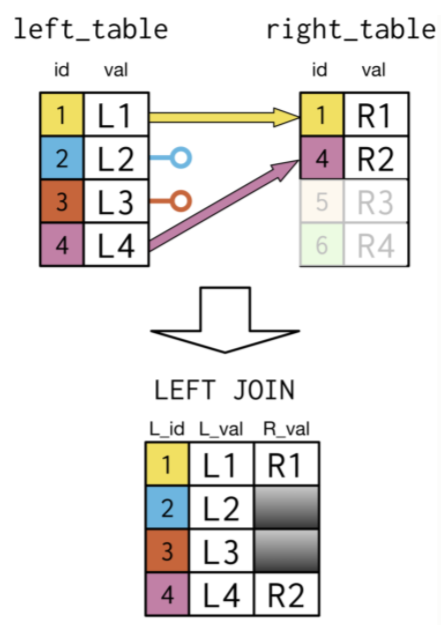



In [63]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine("sqlite:///leaders.db")

pd.read_sql_query('''SELECT p1.country, prime_minister, president
                     FROM prime_ministers AS p1
                     LEFT JOIN presidents AS p2
                     USING (country)''', con=engine).head(8)


,country,prime_minister,president
0,Egypt,Sherif Ismail,Abdel Fattah el-Sisi
1,Portugal,Antonio Costa,Marcelo Rebelo de Sousa
2,Vietnam,Nguyen Xuan Phuc,Tran Dai Quang
3,Haiti,Jack Guy Lafontant,Jovenel Moise
4,India,Narendra Modi,None
5,Australia,Malcolm Turnbull,None
6,Norway,Erna Solberg,None
7,Brunei,Hassanal Bolkiah,None


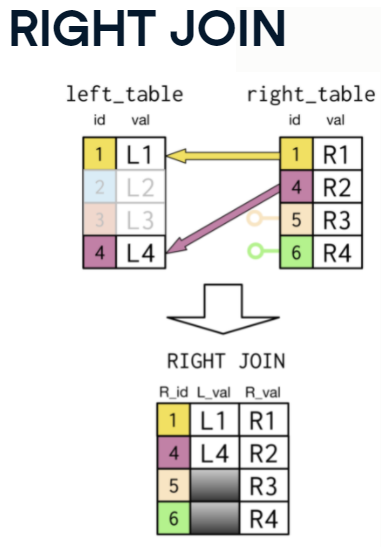

In [2]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("sqlite:///diagrams.db")
print("LEFT TABLE")
display(pd.read_sql_query("SELECT * FROM left_table", engine))

print("\nRIGHT TABLE")
display(pd.read_sql_query("SELECT * FROM right_table", engine))

print("\nINNER JOIN")
display(pd.read_sql_query('''SELECT right_table.id AS R_id,
                                    left_table.val AS L_val,
                                    right_table.val AS R_val
                             FROM left_table
                             INNER JOIN right_table
                             ON left_table.id = right_table.id;''', engine))
print("\nLEFT JOIN")
display(pd.read_sql_query('''SELECT right_table.id AS R_id,
                                    left_table.val AS L_val,
                                    right_table.val AS R_val
                             FROM left_table
                             LEFT JOIN right_table
                             ON left_table.id = right_table.id;''', engine))

print("\nRIGHT JOIN")
display(pd.read_sql_query('''SELECT right_table.id AS R_id,
                                    left_table.val AS L_val,
                                    right_table.val AS R_val
                             FROM right_table
                             LEFT JOIN left_table
                             ON left_table.id = right_table.id;''', engine))

LEFT TABLE


,id,val
0,1,L1
1,2,L2
2,3,L3
3,4,L4



RIGHT TABLE


,id,val
0,1,R1
1,4,R2
2,5,R3
3,6,R4



INNER JOIN


,R_id,L_val,R_val
0,1,L1,R1
1,4,L4,R2



LEFT JOIN


,R_id,L_val,R_val
0,1.0,L1,R1
1,NaN,L2,None
2,NaN,L3,None
3,4.0,L4,R2



RIGHT JOIN


,R_id,L_val,R_val
0,1,L1,R1
1,4,L4,R2
2,5,None,R3
3,6,None,R4


### **Left Join**
Now you'll explore the differences between performing an inner join and a left join using the `cities` and `countries` tables.

You'll begin by performing an inner join with the `cities` table on the left and the `countries` table on the right. Remember to alias the name of the city field as `city` and the name of the country field as `country`.

You will then change the query to a left join. Take note of how many records are in each query here!

* Fill in the code based on the instructions in the code comments to complete the inner join. Note how many records are in the result of the join in the query result.

In [5]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine("sqlite:///countries.db")
pd.read_sql_query('''SELECT c1.name AS city, code, 
                            c2.country_name AS country,
                            region, 
                            city_proper_pop
                     FROM cities AS c1
                     INNER JOIN countries AS c2 ON c1.country_code = c2.code
                     ORDER BY code DESC; ''', engine)

,city,code,country,region,city_proper_pop
0,Harare,ZWE,Zimbabwe,Eastern Africa,1606000.0
1,Lusaka,ZMB,Zambia,Eastern Africa,1742979.0
2,Cape Town,ZAF,South Africa,Southern Africa,3740026.0
3,Durban,ZAF,South Africa,Southern Africa,3442361.0
4,Ekurhuleni,ZAF,South Africa,Southern Africa,3178470.0
...,...,...,...,...,...
225,Rosario,ARG,Argentina,South America,1193605.0
226,Abu Dhabi,ARE,United Arab Emirates,Middle East,1145000.0
227,Dubai,ARE,United Arab Emirates,Middle East,2643410.0
228,Luanda,AGO,Angola,Central Africa,2825311.0


* Change the code to perform a LEFT JOIN instead of an INNER JOIN. After executing this query, note how many records the query result contains.

In [6]:
pd.read_sql_query('''SELECT c1.name AS city, code, 
                            c2.country_name AS country,
                            region, 
                            city_proper_pop
                     FROM cities AS c1
                     LEFT JOIN countries AS c2 ON c1.country_code = c2.code
                     ORDER BY code DESC; ''', engine)

,city,code,country,region,city_proper_pop
0,Harare,ZWE,Zimbabwe,Eastern Africa,1606000.0
1,Lusaka,ZMB,Zambia,Eastern Africa,1742979.0
2,Cape Town,ZAF,South Africa,Southern Africa,3740026.0
3,Durban,ZAF,South Africa,Southern Africa,3442361.0
4,Ekurhuleni,ZAF,South Africa,Southern Africa,3178470.0
...,...,...,...,...,...
231,Kaohsiung,None,None,None,2778918.0
232,New Taipei City,None,None,None,3954929.0
233,Taichung,None,None,None,2752413.0
234,Tainan,None,None,None,1885252.0


# **Left join (2)**

Next, you'll try out another example comparing an inner join to its corresponding left join. Before you begin though, take note of how many records are in both the `countries` and `languages` tables below.

You will begin with an inner join on the `countries` table on the left with the `languages` table on the right. Then you'll change the code to a left join in the next bullet.

* Select `country_name` AS `country`, the country's `local name`, the language name AS `language`, and
the `percent` of the language spoken in the country
* Perform an inner join and alias the name of the `country` field as `country` and the name of the language field as `language`.
* Sort based on descending country name.

In [15]:
pd.read_sql_query('''SELECT c.country_name AS country, 
                            local_name, 
                            l.name AS language, 
                            percent
                     FROM countries AS c
                     INNER JOIN languages AS l
                     USING (code)
                     ORDER BY country DESC;''', engine)

,country,local_name,language,percent
0,Zimbabwe,Zimbabwe,Shona,NaN
1,Zimbabwe,Zimbabwe,Ndebele,NaN
2,Zimbabwe,Zimbabwe,English,NaN
3,Zimbabwe,Zimbabwe,Chewa,NaN
4,Zimbabwe,Zimbabwe,Chibarwe,NaN
...,...,...,...,...
909,Albania,Shqiperia,unspecified,0.1
910,Afghanistan,Afganistan/Afqanestan,Dari,50.0
911,Afghanistan,Afganistan/Afqanestan,Pashto,35.0
912,Afghanistan,Afganistan/Afqanestan,Turkic,11.0


* Perform a left join instead of an inner join. Observe the result, and also note the change in the number of records in the result.
* Carefully review which records appear in the left join result, but not in the inner join result.

In [14]:
pd.read_sql_query('''SELECT c.country_name AS country, 
                            local_name, 
                            l.name AS language, 
                            percent
                     FROM countries AS c
                     LEFT JOIN languages AS l
                     USING (code)
                     ORDER BY country DESC; ''', engine)

,country,local_name,language,percent
0,Zimbabwe,Zimbabwe,Chewa,NaN
1,Zimbabwe,Zimbabwe,Chibarwe,NaN
2,Zimbabwe,Zimbabwe,English,NaN
3,Zimbabwe,Zimbabwe,Kalanga,NaN
4,Zimbabwe,Zimbabwe,Koisan,NaN
...,...,...,...,...
916,Albania,Shqiperia,unspecified,0.1
917,Afghanistan,Afganistan/Afqanestan,Dari,50.0
918,Afghanistan,Afganistan/Afqanestan,Other,4.0
919,Afghanistan,Afganistan/Afqanestan,Pashto,35.0


### **Left join (3)**
You'll now revisit the use of the `AVG()` function. You will use it in combination with left join to determine the average gross domestic product (GDP) per capita <ins>**by region**</ins> in 2010.

* Begin with a left join with the `countries` table on the left and the `economies` table on the right.
* Focus only on records with 2010 as the year.

In [17]:
pd.read_sql_query('''SELECT country_name, region, gdp_percapita
                     FROM countries AS c
                     LEFT JOIN economies AS e
                     USING (code)
                     WHERE year = 2010;''', con=engine).head()

,country_name,region,gdp_percapita
0,Afghanistan,Southern and Central Asia,539.667
1,Netherlands,Western Europe,50433.310
2,Albania,Southern Europe,4098.130
3,Algeria,Northern Africa,4480.720
4,Angola,Central Africa,3599.270


* Modify your code to calculate the average GDP per capita AS `avg_gdp` for <ins>**each region**</ins> in 2010.
* Select the `region` and `avg_gdp` fields.

In [18]:
pd.read_sql_query('''SELECT region, AVG(gdp_percapita) AS avg_gdp
                     FROM countries AS c
                     LEFT JOIN economies AS e
                     USING (code)
                     WHERE year = 2010
                     GROUP BY region;''', engine)

,region,avg_gdp
0,Australia and New Zealand,44792.385000
1,Baltic Countries,12631.030000
2,British Islands,43588.330000
3,Caribbean,11413.339462
4,Central Africa,4797.239889
5,Central America,4969.970000
6,Eastern Africa,1757.348188
7,Eastern Asia,26205.851667
8,Eastern Europe,10095.456667
9,Melanesia,2532.610000


* Arrange this data on average GDP per capita for each region in 2010 from highest to lowest average GDP per capita.

In [19]:
pd.read_sql_query('''SELECT region, AVG(gdp_percapita) AS avg_gdp
                     FROM countries AS c
                     LEFT JOIN economies AS e
                     USING (code)
                     WHERE year = 2010
                     GROUP BY region
                     ORDER BY avg_gdp DESC;''', engine)

,region,avg_gdp
0,Western Europe,58130.962857
1,Nordic Countries,57073.998000
2,North America,47911.510000
3,Australia and New Zealand,44792.385000
4,British Islands,43588.330000
5,Eastern Asia,26205.851667
6,Southern Europe,22926.410909
7,Middle East,18204.641765
8,Baltic Countries,12631.030000
9,Caribbean,11413.339462


# **Right join**

Right joins aren't as common as left joins. One reason why is that you <ins>can always write a right join as a left join</ins>.



In [22]:
df1 = pd.read_sql_query('''SELECT cities.name AS city, 
                                  urbanarea_pop, 
                                  countries.country_name AS country,
                                  indep_year,
                                  languages.name AS language, 
                                  percent
                           FROM cities
                           LEFT JOIN countries ON cities.country_code = countries.code
                           LEFT JOIN languages ON countries.code = languages.code
                           ORDER BY city, language; ''', engine)

df2 = pd.read_sql_query('''SELECT cities.name AS city, 
                                  urbanarea_pop, 
                                  countries.country_name AS country,
                                  indep_year, 
                                  languages.name AS language, 
                                  percent
                           FROM languages
                           RIGHT JOIN countries ON countries.code = languages.code
                           RIGHT JOIN cities ON cities.country_code = countries.code
                           ORDER BY city, language; ''', engine)

print(df1.equals(df2))

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 52))



OperationalError: ignored

SQLite doesn't support full join.  Here is how to replicate it.

In [33]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine("sqlite:///diagrams.db")

print("LEFT_TABLE")
display(pd.read_sql_query('''SELECT * FROM left_table''', engine))

print("\nRIGHT_TABLE")
display(pd.read_sql_query('''SELECT * FROM right_table''', engine))

print("\nFULL JOIN")
pd.read_sql_query('''SELECT l.id AS L_id,
                            r.id AS R_id,
                            l.val AS L_val,
                            r.val AS R_val
                     FROM right_table AS r
                     LEFT JOIN left_table AS l USING(id)
                     UNION
                     SELECT l.id AS L_id,
                            r.id AS R_id,
                            l.val AS L_val,
                            r.val AS R_val
                     FROM left_table AS l
                     LEFT JOIN right_table AS r USING(id)
                     ; ''', engine)

LEFT_TABLE


,id,val
0,1,L1
1,2,L2
2,3,L3
3,4,L4



RIGHT_TABLE


,id,val
0,1,R1
1,4,R2
2,5,R3
3,6,R4



FULL JOIN


,L_id,R_id,L_val,R_val
0,NaN,5.0,None,R3
1,NaN,6.0,None,R4
2,1.0,1.0,L1,R1
3,2.0,NaN,L2,None
4,3.0,NaN,L3,None
5,4.0,4.0,L4,R2


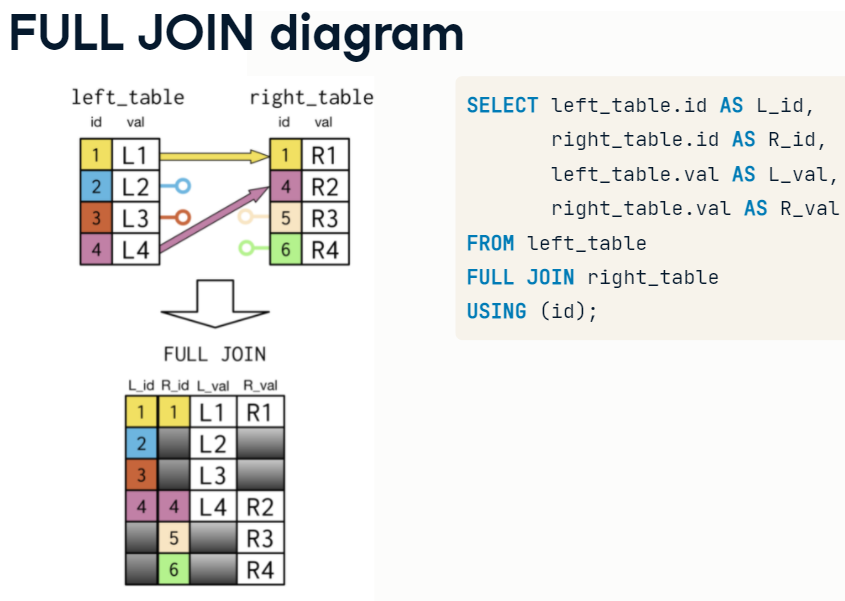

In [36]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine("sqlite:///leaders.db")
pd.read_sql_query('''SELECT p1.country AS pm_co,
                            p2.country AS pres_co,
                            prime_minister,
                            president
                     FROM prime_ministers AS p1
                     LEFT JOIN presidents AS p2 USING(country)
                     UNION
                     SELECT p1.country AS pm_co,
                            p2.country AS pres_co,
                            prime_minister,
                            president
                     FROM presidents AS p2
                     LEFT JOIN prime_ministers AS p1 USING(country);  ''', engine)


,pm_co,pres_co,prime_minister,president
0,None,Chile,None,Michelle Bachelet
1,None,Liberia,None,Ellen Johnson Sirleaf
2,None,Uruguay,None,Jose Mujica
3,Australia,None,Malcolm Turnbull,None
4,Brunei,None,Hassanal Bolkiah,None
5,Egypt,Egypt,Sherif Ismail,Abdel Fattah el-Sisi
6,Haiti,Haiti,Jack Guy Lafontant,Jovenel Moise
7,India,None,Narendra Modi,None
8,Norway,None,Erna Solberg,None
9,Oman,None,Qaboos bin Said al Said,None


### **Full join**
In this exercise, you'll examine how your results differ when using a FULL JOIN versus using a LEFT JOIN versus using an INNER JOIN with the `countries` and `currencies` tables.

You will focus on the North American `region` and also where the `country_name` of the country is missing. Dig in to see what we mean!

Begin with a FULL JOIN with `countries` on the left and `currencies` on the right. The fields of interest is `SELECT country_name AS country, code, region, basic_unit`

Then complete a similar LEFT JOIN and conclude with an INNER JOIN.

* Choose records in which `region` corresponds to `North America` or is `NULL`.

```
SELECT name AS country, code, region, basic_unit
FROM countries
FULL JOIN currencies
USING (code)
WHERE region = 'North America' OR name IS NULL
ORDER BY region;
```



In [56]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine("sqlite:///countries.db")
pd.read_sql_query('''SELECT country_name AS country, code, region, basic_unit
                     FROM countries
                     LEFT JOIN currencies
                     USING (code)
                     WHERE region = 'North America' OR country_name IS NULL
                     UNION
                     SELECT country_name AS country, code, region, basic_unit
                     FROM currencies
                     LEFT JOIN countries
                     USING (code)
                     WHERE region = 'North America' OR region IS NULL
                     ORDER BY region; ''', engine)

,country,code,region,basic_unit
0,None,AIA,None,East Caribbean dollar
1,None,CCK,None,Australian dollar
2,None,COK,None,New Zealand dollar
3,None,FLK,None,Falkland Islands pound
4,None,IOT,None,United States dollar
5,None,MSR,None,East Caribbean dollar
6,None,NIU,None,New Zealand dollar
7,None,ROM,None,Romanian leu
8,None,SGS,None,British pound
9,None,SHN,None,Saint Helena pound


ข้อมูลในตารางที่ดาวน์โหลดมา กับข้อมูลบนเว็บ มีความแตกต่างกัน 

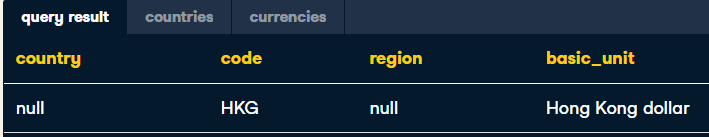

In [57]:
pd.read_sql_query('''SELECT country_name AS country, code, region, basic_unit
                     FROM currencies
                     LEFT JOIN countries
                     USING (code)
                     WHERE code = 'HKG';''', engine)

,country,code,region,basic_unit
0,Hong Kong,HKG,Eastern Asia,Hong Kong dollar


* Repeat the same query as before, using a `LEFT JOIN` instead of a `FULL JOIN`. Note what has changed compared to the `FULL JOIN` result!

In [58]:
pd.read_sql_query('''SELECT country_name AS country, code, region, basic_unit
                     FROM countries
                     LEFT JOIN currencies
                     USING (code)
                     WHERE region = 'North America' OR country_name IS NULL
                     ORDER BY region DESC;''', engine)

,country,code,region,basic_unit
0,Bermuda,BMU,North America,Bermudian dollar
1,Greenland,GRL,North America,None
2,Canada,CAN,North America,Canadian dollar
3,United States,USA,North America,United States dollar


* Repeat the same query again but use an `INNER JOIN` instead of a `FULL JOIN`. Note what has changed compared to the `FULL JOIN` and `LEFT JOIN` results!

In [59]:
pd.read_sql_query('''SELECT country_name AS country, code, region, basic_unit
                     FROM countries
                     INNER JOIN currencies
                     USING (code)
                     WHERE region = 'North America' OR country_name IS NULL
                     ORDER BY region DESC;''', engine)

,country,code,region,basic_unit
0,Bermuda,BMU,North America,Bermudian dollar
1,Canada,CAN,North America,Canadian dollar
2,United States,USA,North America,United States dollar


### **Full join (2)**
You'll now investigate a similar exercise to the last one, but this time focused on using a table with more records on the left than the right. You'll work with the `languages` and `countries` tables.

Begin with a full join with `languages` on the left and `countries` on the right.

* `SELECT countries.country_name, code, languages.name AS language`
* Choose records in which `countries.country_name` starts with the capital letter `'V'` or is `NULL`.
* Arrange by `countries.country_name` in ascending order to more clearly see the results.

In [1]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine("sqlite:///countries.db")
pd.read_sql_query('''SELECT c.country_name, code, l.name AS language
                     FROM countries c
                     LEFT JOIN languages l
                     USING (code)
                     WHERE c.country_name LIKE 'V%' OR c.country_name IS NULL
                     UNION
                     SELECT c.country_name, code, l.name AS language
                     FROM languages l
                     LEFT JOIN countries c
                     USING (code)
                     WHERE c.country_name LIKE 'V%' OR c.country_name IS NULL
                     ORDER BY c.country_name;''', engine)

,country_name,code,language
0,None,AIA,English
1,None,CCK,English
2,None,CCK,Malay
3,None,COK,English
4,None,COK,Other
5,None,COK,Rarotongan
6,None,CXR,Chinese
7,None,CXR,English
8,None,CXR,Malay
9,None,ESH,Hassaniya


* Repeat the same query as before, using a LEFT JOIN instead of a FULL JOIN. Note what has changed compared to the FULL JOIN result!

In [3]:
pd.read_sql_query('''SELECT c.country_name, code, l.name AS language
                     FROM languages l
                     LEFT JOIN countries c
                     USING (code)
                     WHERE c.country_name LIKE 'V%' OR c.country_name IS NULL
                     ORDER BY c.country_name;''', engine)

,country_name,code,language
0,None,AIA,English
1,None,CXR,English
2,None,CXR,Chinese
3,None,CXR,Malay
4,None,CCK,Malay
5,None,CCK,English
6,None,COK,English
7,None,COK,Rarotongan
8,None,COK,Other
9,None,MSR,English


In [6]:
pd.read_sql_query('''SELECT c.country_name, code, l.name AS language
                     FROM languages l
                     INNER JOIN countries c
                     USING (code)
                     WHERE c.country_name LIKE 'V%' OR c.country_name IS NULL
                     ORDER BY c.country_name;''', engine)

,country_name,code,language
0,Vanuatu,VUT,Tribal Languages
1,Vanuatu,VUT,Bislama
2,Vanuatu,VUT,English
3,Vanuatu,VUT,French
4,Vanuatu,VUT,Other
5,Venezuela,VEN,Spanish
6,Venezuela,VEN,indigenous
7,Vietnam,VNM,Vietnamese
8,Vietnam,VNM,English
9,Vietnam,VNM,Other


# **Full join (3)**

You'll now explore using two consecutive full joins on the three tables you worked with in the previous two exercises.

* Complete a FULL JOIN with `countries` on the left and `languages` on the right.
* Next, FULL JOIN this result with `currencies` on the right.
* Use `LIKE` to choose the `Melanesia` and `Micronesia` regions (Hint: `'M%esia'`).
* Select the fields corresponding to the `country_name` AS `country`, `region`, language name `AS language`, and `basic_unit` and `frac_unit` of currency.


```
SELECT c1.name AS country, region, l.name AS language basic_unit, frac_unit
FROM countries c1
FULL JOIN languages l
USING (code)
FULL JOIN currencies AS c2
USING (code)
WHERE region LIKE 'M%esia';
```



# **CROSS JOIN**

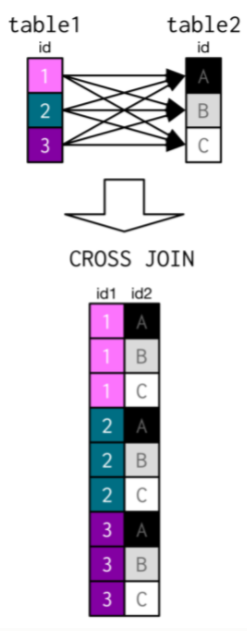

## **Pairing Prime Ministers with Presidents**

In [17]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///leaders.db")

pd.read_sql_query('''SELECT prime_minister, president
                          FROM prime_ministers p1
                          CROSS JOIN presidents p2
                          WHERE p1.continent IN ('North America', 'Oceania')''', engine)

,prime_minister,president
0,Jack Guy Lafontant,Abdel Fattah el-Sisi
1,Jack Guy Lafontant,Marcelo Rebelo de Sousa
2,Jack Guy Lafontant,Jovenel Moise
3,Jack Guy Lafontant,Jose Mujica
4,Jack Guy Lafontant,Ellen Johnson Sirleaf
5,Jack Guy Lafontant,Michelle Bachelet
6,Jack Guy Lafontant,Tran Dai Quang
7,Malcolm Turnbull,Abdel Fattah el-Sisi
8,Malcolm Turnbull,Marcelo Rebelo de Sousa
9,Malcolm Turnbull,Jovenel Moise


### **A table of two cities**

This exercise looks to explore languages potentially *and* most frequently spoken in the cities of Hyderabad, India and Hyderabad, Pakistan.

* Create a CROSS JOIN with `cities AS c` on the left and `languages AS l` on the right.
* Make use of `LIKE` and `Hyder%` to choose Hyderabad in both countries.
* Select only the city name `AS city` and language name `AS language`.

In [19]:
engine = create_engine("sqlite:///countries.db")
pd.read_sql_query('''SELECT c.name AS city, l.name AS language
                     FROM cities c        
                     CROSS JOIN languages l
                     WHERE c.name LIKE 'Hyder%'; ''', engine).head()

,city,language
0,Hyderabad,Dari
1,Hyderabad,Pashto
2,Hyderabad,Turkic
3,Hyderabad,Other
4,Hyderabad,Albanian


* Use an INNER JOIN instead of a CROSS JOIN. Think about what the difference will be in the results for this INNER JOIN result and the one for the CROSS JOIN.

In [20]:
pd.read_sql_query('''SELECT c.name AS city, l.name AS language
                     FROM cities c        
                     INNER JOIN languages l
                     WHERE c.name LIKE 'Hyder%'; ''', engine).head()

,city,language
0,Hyderabad,Dari
1,Hyderabad (India),Dari
2,Hyderabad,Pashto
3,Hyderabad (India),Pashto
4,Hyderabad,Turkic


### **Outer challenge**

Now that you're fully equipped to use `OUTER JOIN`s, try a challenge problem to test your knowledge!

In terms of life expectancy for 2010, determine the names of the lowest five countries and their regions.

* `Select country_name AS country`, `region`, and `life_expectancy` AS `life_exp`.
* Make sure to use `LEFT JOIN`, `WHERE`,` ORDER BY`, and `LIMIT`.

In [26]:
engine = create_engine("sqlite:///countries.db")
pd.read_sql_query('''SELECT c.country_name AS country, region, p.life_expectancy AS life_exp
                     FROM countries c
                     LEFT JOIN populations p ON p.country_code = c.code
                     WHERE year = 2010 AND life_exp IS NOT NULL
                     ORDER BY life_exp
                     LIMIT 5 ''', engine)

,country,region,life_exp
0,Lesotho,Southern Africa,47.483415
1,Central African Republic,Central Africa,47.625317
2,Sierra Leone,Western Africa,48.228951
3,Swaziland,Southern Africa,48.345756
4,Zimbabwe,Eastern Africa,49.574659


ตรง `life_exp IS NOT NULL` ถ้าเป็น SQL version อื่น อาจต้องใช้ชื่อเต็ม `p.life_expectancy IS NOT NULL`

# **UNION, UNION ALL, EXCEPT, INTERSECT**

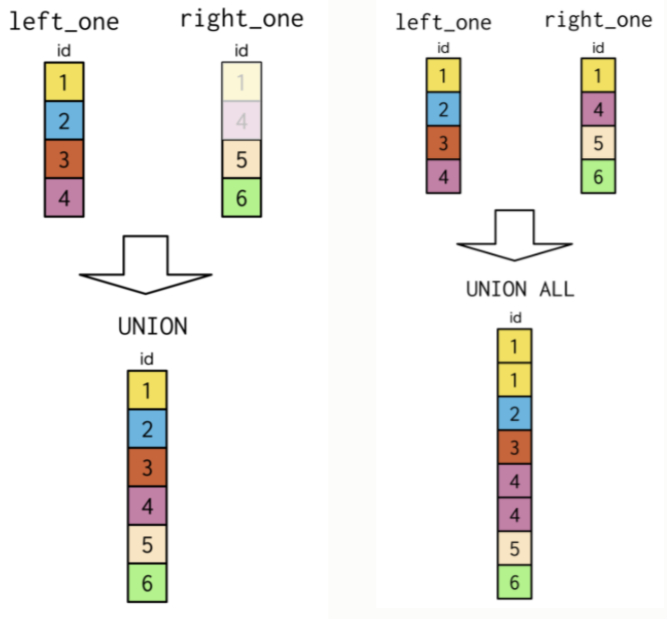



In [29]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine("sqlite:///leaders.db")

display(pd.read_sql_query("SELECT * FROM monarchs", engine))
display(pd.read_sql_query('''SELECT prime_minister AS leader, country
                             FROM prime_ministers
                             UNION ALL
                             SELECT monarch, country
                             FROM monarchs
                             ORDER BY country;''', engine))

,country,continent,monarch
0,Brunei,Asia,Hassanal Bolkiah
1,Oman,Asia,Qaboos bin Said al Said
2,Norway,Europe,Harald V
3,Spain,Europe,Felipe VI


,leader,country
0,Malcolm Turnbull,Australia
1,Hassanal Bolkiah,Brunei
2,Hassanal Bolkiah,Brunei
3,Sherif Ismail,Egypt
4,Jack Guy Lafontant,Haiti
5,Narendra Modi,India
6,Erna Solberg,Norway
7,Harald V,Norway
8,Qaboos bin Said al Said,Oman
9,Qaboos bin Said al Said,Oman


จะเห็นว่า มี บรูไน กับ โอมาน ที่ผู้นำประเทศเป็นทั้ง monarchs และ primeministers

In [30]:
pd.read_sql_query('''SELECT prime_minister AS leader, country
                             FROM prime_ministers
                             UNION
                             SELECT monarch, country
                             FROM monarchs
                             ORDER BY country;''', engine)

,leader,country
0,Malcolm Turnbull,Australia
1,Hassanal Bolkiah,Brunei
2,Sherif Ismail,Egypt
3,Jack Guy Lafontant,Haiti
4,Narendra Modi,India
5,Erna Solberg,Norway
6,Harald V,Norway
7,Qaboos bin Said al Said,Oman
8,Antonio Costa,Portugal
9,Felipe VI,Spain


### **Union**

You have two new tables, `economies2010` and `economies2015`, available to you. The `economies` table is also included for reference.

* Combine the two new tables into one table containing all of the fields in `economies2010`.
* Sort this resulting single table by country code and then by year, both in ascending order.

In [31]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine("sqlite:///countries.db")

pd.read_sql_query('''SELECT * FROM economies2010
                     UNION
                     SELECT * FROM economies2015
                     ORDER BY code, year;''', engine).head()

,code,year,income_group,gross_savings
0,AFG,2010,Low income,37.133
1,AFG,2015,Low income,21.466
2,AGO,2010,Upper middle income,23.534
3,AGO,2015,Upper middle income,-0.425
4,ALB,2010,Upper middle income,20.011


# **Union (2)**

`UNION` can also be used to determine all occurrences of a field across multiple tables. 

* Determine all (non-duplicated) country codes in either the `cities` or the `currencies` table. The result should be a table with only one field called `country_code`.
* Sort by `country_code` in alphabetical order.

In [33]:
pd.read_sql_query('''SELECT country_code
                     FROM cities
                     UNION
                     SELECT code
                     FROM currencies
                     ORDER BY country_code;''', engine).head()

,country_code
0,ABW
1,AFG
2,AGO
3,AIA
4,ALB


# **Union all**

As you saw, duplicates were removed from the previous two exercises by using `UNION`.

To include duplicates, you can use `UNION ALL`.

* Determine all combinations (include duplicates) of country code and year that exist in either the `economies` or the `populations` tables. Order by `code` then `year`.
* The result of the query should only have two columns/fields. Think about how many records this query should result in.
* You'll use code very similar to this in your next exercise after the video. Make note of this code after completing it.

In [35]:
pd.read_sql_query('''SELECT code, year FROM economies
                     UNION ALL
                     SELECT country_code, year FROM populations
                     ORDER BY code, year; ''', engine).head()

,code,year
0,ABW,2010
1,ABW,2015
2,AFG,2010
3,AFG,2010
4,AFG,2015


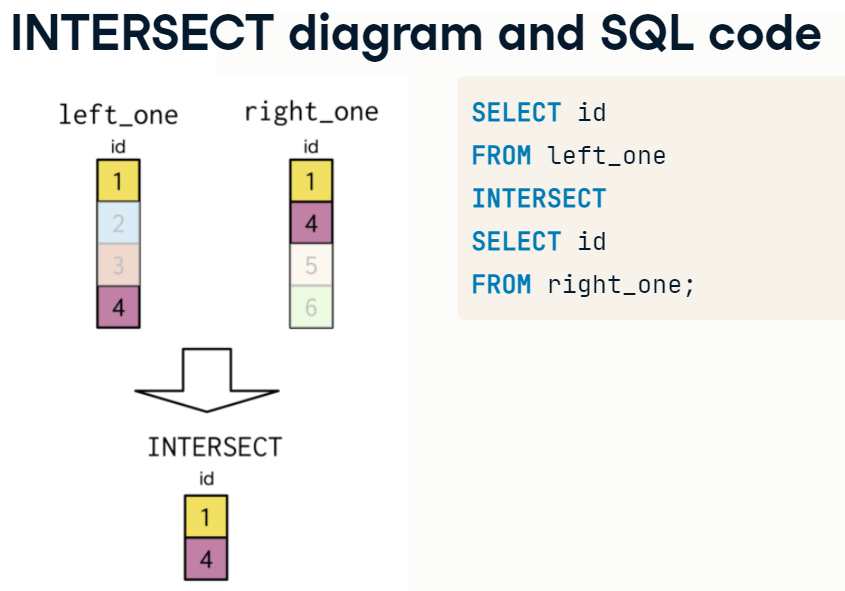

## **Prime minister and President Table**

เลือกประเทศที่มีทั้งประธานาธิบดี และนายกรัฐมนตรี

In [37]:
engine = create_engine("sqlite:///leaders.db")
pd.read_sql_query('''SELECT country FROM prime_ministers 
                     INTERSECT
                     SELECT country FROM presidents''', engine)

,country
0,Egypt
1,Haiti
2,Portugal
3,Vietnam


ไม่มีประเทศไหน ที่มีประธานาธิบดี กับ นายกรัฐมนตรี เป็นชื่อเดียวกัน

In [38]:
pd.read_sql_query('''SELECT country, prime_minister AS leader FROM prime_ministers 
                     INTERSECT
                     SELECT country, president FROM presidents''', engine)

,country,leader


ถ้าจำได้ ข้างบนตะกี้ มีสองประเทศที่มีนายก กับ monarchs เป็นชื่อเดียวกัน

In [39]:
pd.read_sql_query('''SELECT country, prime_minister AS leader FROM prime_ministers 
                     INTERSECT
                     SELECT country, monarch FROM monarchs''', engine)

,country,leader
0,Brunei,Hassanal Bolkiah
1,Oman,Qaboos bin Said al Said


### **Intersect**

`UNION ALL` will extract all records from two tables, while `INTERSECT` will only return records that both tables have in common. In this exercise, you will create a similar query as before, however, this time you will look at the records in common for country code and year for the `economies` and `populations` tables.

Note the number of records from the result of this query compared to the similar `UNION ALL` query result of 814 records.

* Use `INTERSECT` to determine the records in common for country code and year for the `economies` and `populations` tables.

* Again, order by `code` and then by `year`, both in ascending order.

In [42]:
engine = create_engine("sqlite:///countries.db")

pd.read_sql_query('''SELECT code, year FROM economies
                     INTERSECT
                     SELECT country_code, year FROM populations
                     ORDER BY code, year; ''', engine).head()

,code,year
0,AFG,2010
1,AFG,2015
2,AGO,2010
3,AGO,2015
4,ALB,2010


# **Intersect (2)**
As you think about major world cities and their corresponding country, you may ask which countries also have a city with the same name as their country name?

* Use `INTERSECT` to answer this question with `countries` and `cities`!

In [44]:
pd.read_sql_query('''SELECT country_name FROM countries
	                   INTERSECT
                     SELECT name FROM cities;''', engine)

,country_name
0,Hong Kong
1,Singapore


# **EXCEPT**

## **Monarchs that are not prime ministers**

In [45]:
engine = create_engine("sqlite:///leaders.db")
pd.read_sql_query('''SELECT monarch, country FROM monarchs
                     EXCEPT
                     SELECT prime_minister, country
                     FROM prime_ministers;''', engine)

,monarch,country
0,Felipe VI,Spain
1,Harald V,Norway


In [57]:
display(pd.read_sql_query('''SELECT monarch, country FROM monarchs ;''', engine))
print("\n\n")
display(pd.read_sql_query('''SELECT prime_minister, country FROM prime_ministers WHERE country IN ('Brunei', 'Oman', 'Norway', 'Spain');''', engine))

,monarch,country
0,Hassanal Bolkiah,Brunei
1,Qaboos bin Said al Said,Oman
2,Harald V,Norway
3,Felipe VI,Spain


,prime_minister,country
0,Hassanal Bolkiah,Brunei
1,Erna Solberg,Norway
2,Qaboos bin Said al Said,Oman
3,Mariano Rajoy,Spain


จะเห็นว่า EXCEPT ดูว่ามีทั้งสองคอลัมน์ที่เลือกมา มี `Hassanal Bolkiah	Brunei` และ `Qaboos bin Said al Said	Oman` ที่ซ้ำกันทั้งคู่

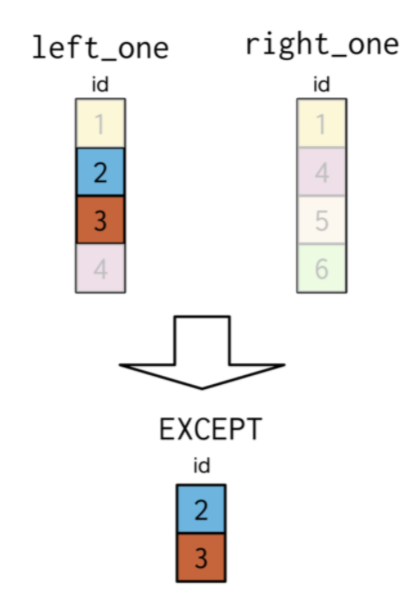

### **Except**

Get the names of cities in `cities` which are not noted as capital cities in `countries` as a single field result.

Note that there are some countries in the world that are not included in the `countries` table, which will result in some cities not being labeled as capital cities when in fact they are.

* Order the resulting field in ascending order.
* Can you spot the city/cities that are actually capital cities which this query misses?

In [62]:
engine = create_engine("sqlite:///countries.db")
pd.read_sql_query('''SELECT name FROM cities
                     EXCEPT
                     SELECT capital FROM countries
                     ORDER BY name;''', engine)

,name
0,Abidjan
1,Ahmedabad
2,Alexandria
3,Almaty
4,Auckland
...,...
165,Yekaterinburg
166,Yokohama
167,Zhengzhou
168,Zhongshan


# **Except (2)**

Now you will complete the previous query in reverse!

Determine the names of capital cities that are not listed in the cities table.

* Order by `capital` in ascending order.
* The `cities` table contains information about 236 of the world's most populous cities. The result of your query may surprise you in terms of the number of capital cities that do not appear in this list!

In [61]:
pd.read_sql_query('''SELECT capital FROM countries
                     EXCEPT
                     SELECT name FROM cities
                     ORDER BY capital''', engine)

,capital
0,None
1,Agana
2,Amman
3,Amsterdam
4,Andorra la Vella
...,...
131,Wellington
132,Windhoek
133,Yamoussoukro
134,Yaren District


# **SEMI_JOIN and ANTI-JOIN**

* สมมติอยากรู้ว่าประธานาธิบดีประเทศไหนที่ประเทศนั้นได้รับเอกราชก่อนปี 1800
* `SEMI-JOIN` จะเลือกข้อมูลในตารางแรก ที่เป็นไปตามเงื่อนไข `WHERE (subquery)`
* `ANTI-JOIN` จะเลือกข้อมูลในตารางแรก ที่<ins>**ไม่เป็น**</ins>ไปตามเงื่อนไข `WHERE (subquery)`

In [64]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("sqlite:///leaders.db")
display(pd.read_sql_query('''SELECT name FROM states WHERE indep_year < 1800''', engine))
print("\n\n")
display(pd.read_sql_query('''SELECT president, country, continent FROM presidents''', engine))

,name
0,Portugal
1,Spain


,president,country,continent
0,Abdel Fattah el-Sisi,Egypt,Africa
1,Marcelo Rebelo de Sousa,Portugal,Europe
2,Jovenel Moise,Haiti,North America
3,Jose Mujica,Uruguay,South America
4,Ellen Johnson Sirleaf,Liberia,Africa
5,Michelle Bachelet,Chile,South America
6,Tran Dai Quang,Vietnam,Asia


## **Intro to subqueries**

In [67]:
pd.read_sql_query('''SELECT president, country, continent FROM presidents
                     WHERE country IN (
                     SELECT name FROM states WHERE indep_year < 1800);''', engine)

,president,country,continent
0,Marcelo Rebelo de Sousa,Portugal,Europe


## **ANTI-JOIN**
* Determine countries in Americas founded after 1800

In [68]:
pd.read_sql_query('''SELECT president, country, continent FROM presidents
                     WHERE continent LIKE '%America'
                     AND country NOT IN (
                     SELECT name FROM states WHERE indep_year < 1800);''', engine)

,president,country,continent
0,Jovenel Moise,Haiti,North America
1,Jose Mujica,Uruguay,South America
2,Michelle Bachelet,Chile,South America


### **Semi-join**

You are now going to use the concept of a `SEMI-JOIN` to identify languages spoken in the Middle East.

* Begin by selecting all country codes in the Middle East as a single field result using `SELECT`, `FROM`, and `WHERE`.

In [71]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///countries.db")
pd.read_sql_query('''SELECT code FROM countries WHERE region = 'Middle East';''', engine)

,code
0,ARE
1,ARM
2,AZE
3,BHR
4,GEO
5,IRQ
6,ISR
7,YEM
8,JOR
9,KWT


* Select only unique languages by name appearing in the `languages` table.
* Order the resulting single field table by `name` in ascending order.

In [72]:
pd.read_sql_query('''SELECT DISTINCT name FROM languages ORDER BY name;''', engine)

,name
0,Afar
1,Afrikaans
2,Akyem
3,Albanian
4,Alsatian
...,...
391,siSwati
392,sign
393,tribal
394,unknown


* Combine the previous two queries into one query by adding a `WHERE IN` statement to the `SELECT DISTINCT` query to determine the unique languages spoken in the Middle East.
* Order the result by `name` in ascending order.

In [73]:
pd.read_sql_query('''SELECT DISTINCT name FROM languages
                     WHERE code IN (SELECT code FROM countries
                                    WHERE region = 'Middle East')
                     ORDER BY name;''', engine)

,name
0,Arabic
1,Aramaic
2,Armenian
3,Azerbaijani
4,Azeri
5,Baluchi
6,Bulgarian
7,Circassian
8,English
9,Farsi


ใช้ `INNER-JOIN` แทนก็ได้

In [75]:
pd.read_sql_query('''SELECT DISTINCT name FROM languages
                     INNER JOIN countries USING(code)
                     WHERE region = 'Middle East'
                     ORDER BY name;''', engine)

,name
0,Arabic
1,Aramaic
2,Armenian
3,Azerbaijani
4,Azeri
5,Baluchi
6,Bulgarian
7,Circassian
8,English
9,Farsi


### **Diagnosing problems using anti-join**

Another powerful join in SQL is the anti-join. It is particularly useful in <ins>identifying which records are **causing an incorrect number of records** to appear</ins> in join queries.

You will also see another example of a subquery here, as you saw in the first exercise on semi-joins. Your goal is to identify the currencies used in Oceanian countries!

* Begin by determining the number of countries in `countries` that are listed in Oceania using `SELECT`, `FROM`, and `WHERE`.

In [78]:
pd.read_sql_query('''SELECT COUNT(DISTINCT country_name) FROM countries WHERE continent = 'Oceania' ''', engine)

,COUNT(DISTINCT country_name)
0,19


* Complete an inner join with `countries AS c1` on the left and `currencies AS c2` on the right to get the different currencies used in the countries of Oceania.
* Match `ON` the `code` field in the two tables.
* Include the country code, country name, and basic_unit AS currency.

Observe the query result and make note of how many different countries are listed here. 

In [80]:
pd.read_sql_query('''SELECT c1.code, country_name, basic_unit AS currency
                     FROM countries c1
                     INNER JOIN currencies c2
                     USING(code)
                     WHERE continent = 'Oceania';''', engine)

,code,country_name,currency
0,AUS,Australia,Australian dollar
1,PYF,French Polynesia,CFP franc
2,KIR,Kiribati,Australian dollar
3,MHL,Marshall Islands,United States dollar
4,NRU,Nauru,Australian dollar
5,NCL,New Caledonia,CFP franc
6,NZL,New Zealand,New Zealand dollar
7,PLW,Palau,United States dollar
8,PNG,Papua New Guinea,Papua New Guinean kina
9,WSM,Samoa,Samoan tala


Note that not all countries in Oceania were listed in the resulting inner join with `currencies`. Use an ANTI-JOIN to determine which countries were not included!

* Use `NOT IN` and (`SELECT code FROM currencies`) as a subquery to get the country code and country name for the Oceanian countries that are not included in the currencies table.

In [84]:
pd.read_sql_query('''SELECT code, country_name FROM countries WHERE continent = 'Oceania'
                     AND code NOT  IN (SELECT code FROM currencies);''', engine)

,code,country_name
0,ASM,American Samoa
1,FJI,Fiji Islands
2,GUM,Guam
3,FSM,"Micronesia, Federated States of"
4,MNP,Northern Mariana Islands


### **Set theory challenge**

Your task here will be to incorporate two of `UNION`/`UNION ALL`/`INTERSECT`/`EXCEPT` to solve a challenge involving three tables.  In addition, you will use a subquery as you have in the last two exercises.

* Identify the country codes that are included in either `economies` or `currencies` but not in `populations`.
* Use that result to determine the names of cities in the countries that match the specification in the previous instruction.

In [85]:
pd.read_sql_query('''-- Select the city name
                     SELECT name
                     -- Alias the table where city name resides
                     FROM cities AS  c1
                     -- Choose only records matching the result of multiple set theory clauses
                     WHERE country_code IN
                    (
                     -- Select appropriate field from economies AS e
                    SELECT e.code
                    FROM economies AS e
                    -- Get all additional (unique) values of the field from currencies AS c2  
                    UNION
                    SELECT c2.code
                    FROM currencies AS c2
                    -- Exclude those appearing in populations AS p
                    EXCEPT
                    SELECT p.country_code
                    FROM populations AS p);''', engine)

,name
0,Bucharest
1,Kaohsiung
2,New Taipei City
3,Taichung
4,Tainan
5,Taipei


## **Subquery inside WHERE clause set-up**



In [91]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///leaders.db')
pd.read_sql_query("SELECT name, indep_year, fert_rate, women_parli_perc	FROM states", engine)

,name,indep_year,fert_rate,women_parli_perc
0,Australia,1901,1.88,32.74
1,Brunei,1984,1.96,6.06
2,Chile,1810,1.80,15.82
3,Egypt,1922,2.70,14.90
4,Haiti,1804,3.03,2.74
5,India,1947,2.43,11.58
6,Liberia,1847,4.64,11.65
7,Norway,1905,1.93,39.60
8,Oman,1951,2.75,8.82
9,Portugal,1143,1.31,34.80


## **Average Fertility Rate**

In [92]:
pd.read_sql_query("SELECT AVG(fert_rate)	FROM states", engine)

,AVG(fert_rate)
0,2.283846


## **Determine Asian Countries that fall under this average**

In [93]:
pd.read_sql_query('''SELECT name, fert_rate FROM states WHERE continent = 'Asia' 
                     AND fert_rate < (SELECT AVG(fert_rate)	FROM states);''', engine)

,name,fert_rate
0,Brunei,1.96
1,Vietnam,1.70


# **Subqueries inside SELECT**

* Count the number of countries listed in the `states` table for each continent in the `prime_ministers` table

In [95]:
pd.read_sql_query('''SELECT DISTINCT continent FROM prime_ministers;''', engine)

,continent
0,Africa
1,Europe
2,Asia
3,North America
4,Oceania


In [64]:
pd.read_sql_query('''SELECT DISTINCT continent,
                    (SELECT COUNT(*) FROM states WHERE prime_ministers.continent = states.continent) AS countries_num
                     FROM prime_ministers;''', engine) #subqueries ใน SELECT ต้องมี alias

,continent,countries_num
0,Africa,2
1,Europe,3
2,Asia,4
3,North America,1
4,Oceania,1


### **Subquery inside where**

You'll now try to figure out which countries had high average life expectancies (at the country level) in 2015.

* Begin by calculating the average life expectancy across all countries for 2015.

In [6]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine("sqlite:///countries.db")
pd.read_sql_query('''SELECT AVG(life_expectancy)
                     FROM populations
                     WHERE year = 2015; ''', engine)

,AVG(life_expectancy)
0,71.676342


* Select all fields from `populations` with records corresponding to larger than 1.15 times the average you calculated in the first task for 2015. 

In [11]:
pd.read_sql_query('''SELECT * FROM populations 
                     WHERE life_expectancy > 1.15 * (SELECT AVG(life_expectancy) FROM populations WHERE year = 2015)
                     AND year = 2015 ; ''', engine)

,pop_id,country_code,year,fertility_rate,life_expectancy,size
0,21,AUS,2015,1.833,82.451220,23789752.0
1,134,FRA,2015,2.010,82.670732,66538391.0
2,170,HKG,2015,1.195,84.278049,7305700.0
3,174,ISL,2015,1.930,82.860976,330815.0
4,190,ITA,2015,1.370,83.490244,60730582.0
5,194,JPN,2015,1.460,83.843659,126958472.0
6,340,SGP,2015,1.240,82.595122,5535002.0
7,356,ESP,2015,1.320,83.380488,46443994.0
8,374,SWE,2015,1.880,82.551220,9799186.0
9,376,CHE,2015,1.540,83.197561,8281430.0


### **Subquery inside where (2)**

Use your knowledge of subqueries in `WHERE` to get the urban area population for only capital cities.

* Make use of the `capital` field in the `countries` table in your subquery.
* Select the city name, country code, and urban area population fields.

In [12]:
pd.read_sql_query('''SELECT name, country_code, urbanarea_pop
                     FROM cities
                     WHERE name IN (SELECT capital FROM countries)
                     ORDER BY urbanarea_pop DESC;''', engine)

,name,country_code,urbanarea_pop
0,Beijing,CHN,21516000.0
1,Dhaka,BGD,14543124.0
2,Tokyo,JPN,13513734.0
3,Moscow,RUS,12197596.0
4,Cairo,EGY,10230350.0
...,...,...,...
61,Dakar,SEN,1146053.0
62,Abu Dhabi,ARE,1145000.0
63,Tripoli,LBY,1126000.0
64,Yerevan,ARM,1060138.0


### **Subquery inside select**

You have seen previously how to use `GROUP BY` with aggregate functions and an `INNER JOIN` to get summarized information from multiple tables.

The code given in the first query selects the top nine countries in terms of number of cities appearing in the `cities` table. Recall that this corresponds to the most populous cities in the world. Your task will be to convert the second query to get the same result as the provided code.

In [80]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine("sqlite:///countries.db")

pd.read_sql_query('''SELECT countries.country_name AS country, COUNT(*) AS cities_num FROM cities
                     INNER JOIN countries
                     ON countries.code = cities.country_code
                     GROUP BY country
                     ORDER BY cities_num DESC, country
                     LIMIT 9;''', engine)

,country,cities_num
0,China,36
1,India,18
2,Japan,11
3,Brazil,10
4,Pakistan,9
5,United States,9
6,Indonesia,7
7,Russian Federation,7
8,South Korea,7


In [81]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine("sqlite:///countries.db")

pd.read_sql_query('''SELECT countries.country_name AS country,
                    (SELECT COUNT(*) FROM cities WHERE countries.code = cities.country_code) AS cities_num
                     FROM countries
                     ORDER BY cities_num DESC, country
                     LIMIT 9;''', engine)

,country,cities_num
0,China,36
1,India,18
2,Japan,11
3,Brazil,10
4,Pakistan,9
5,United States,9
6,Indonesia,7
7,Russian Federation,7
8,South Korea,7


เขียนแบบ INNER JOIN ใช้ไม่ได้ผลเสมอไป ที่แบบฝึกหัดนี้ทำได้เพราะค่าซ้ำมีน้อย ลองไปทำกับ continent ในตัวอย่างข้างบนแล้วไม่ได้

# **Sub Queries in FROM**

In [83]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine("sqlite:///leaders.db")

pd.read_sql_query('''SELECT continent, MAX(women_parli_perc) AS max_perc
                     FROM states
                     GROUP BY continent
                     ORDER BY continent;''', engine)

,continent,max_perc
0,Africa,14.90
1,Asia,24.00
2,Europe,39.60
3,North America,2.74
4,Oceania,32.74
5,South America,22.31


สมมติเราสนใจเฉพาะข้อมูลที่อยู่เฉพาะในตาราง monarchs

In [85]:
pd.read_sql_query('''SELECT monarchs.continent
                     FROM monarchs, states
                     WHERE monarchs.continent = states.continent
                     ORDER BY monarchs.continent; ''', engine)

,continent
0,Asia
1,Asia
2,Asia
3,Asia
4,Asia
5,Asia
6,Asia
7,Asia
8,Europe
9,Europe


* ใส่ `DISTINCT`
* ใช้ subquery ใน `FROM`

In [94]:
pd.read_sql_query('''SELECT DISTINCT m.continent, s.max_perc
                     FROM monarchs m, 
                          (SELECT continent, MAX(women_parli_perc) AS max_perc
                           FROM states
                           GROUP BY continent) AS s     
                     WHERE m.continent = s.continent
                     ORDER BY m.continent; ''', engine)

,continent,max_perc
0,Asia,24.0
1,Europe,39.6


### **Subquery inside from**
The last type of subquery you will work with is one inside of `FROM`.

You will use this to determine the number of languages spoken for each country, identified by the country's local name! (Note this may be different than the `name` field and is stored in the `local_name` field.)

* Begin by determining for each country code how many languages are listed in the `languages` table using `SELECT`, `FROM`, and `GROUP BY`.
* Alias the aggregated field as `lang_num`.

In [96]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///countries.db")

pd.read_sql_query('''SELECT code, COUNT(*) AS lang_num 
                     FROM languages
                     GROUP BY code; ''', engine).head()

,code,lang_num
0,ABW,7
1,AFG,4
2,AGO,12
3,AIA,1
4,ALB,4


* Include the previous query (aliased as `subquery`) as a subquery in the `FROM` clause of a new query.
* Select the `local_name` of the country from `countries`.
* Also, select `lang_num` from subquery.
* Make sure to use `WHERE` appropriately to match `code` in `countries` and in `subquery`.
* Sort by `lang_num` in descending order.

In [98]:
pd.read_sql_query('''SELECT local_name, subquery.lang_num
                     FROM countries,
  	                 (SELECT code, COUNT(*) AS lang_num
  	                  FROM languages
  	                  GROUP BY code) AS subquery
  -- Where codes match
                      WHERE countries.code = subquery.code
                      ORDER BY lang_num DESC; ''', engine).head()

,local_name,lang_num
0,Zambia,19
1,YeItyop´iya,16
2,Zimbabwe,16
3,Bharat/India,14
4,Nepal,14


### **Advanced subquery**
You can also nest multiple subqueries to answer even more specific questions.

In this exercise, for each of the six continents listed in 2015, you'll identify which country had the maximum inflation rate, and how high it was, using multiple subqueries. The table result of your final query should look something like the following, where anything between < > will be filled in with appropriate values:

```
+------------+---------------+-------------------+
| name       | continent     | inflation_rate    |
|------------+---------------+-------------------|
| <country1> | North America | <max_inflation1>  |
| <country2> | Africa        | <max_inflation2>  |
| <country3> | Oceania       | <max_inflation3>  |
| <country4> | Europe        | <max_inflation4>  |
| <country5> | South America | <max_inflation5>  |
| <country6> | Asia          | <max_inflation6>  |
+------------+---------------+-------------------+
```
* Create an `INNER JOIN` with `countries` on the left and `economies` on the right with `USING`, without aliasing your tables or columns.
* Retrieve the `country_name`, `continent`, and `inflation_rate` for 2015.




In [101]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///countries.db")

pd.read_sql('''SELECT country_name, continent, inflation_rate 
               FROM countries
               INNER JOIN economies   
               USING(code)
               WHERE year = 2015; ''', engine).head()

,country_name,continent,inflation_rate
0,Afghanistan,Asia,-1.549
1,Angola,Africa,10.287
2,Albania,Europe,1.896
3,United Arab Emirates,Asia,4.070
4,Argentina,South America,NaN


Select the maximum inflation rate in 2015 `AS max_inf` grouped by continent using the previous step's query as a subquery in the `FROM` clause.

Thus, in your subquery you should:

* Create an inner join with `countries` on the left and `economies` on the right with `USING` (without aliasing your tables or columns).
* Retrieve the `country_name`, `continent`, and `inflation_rate` for 2015.
* Alias the subquery as `subquery`.

This will result in the six maximum inflation rates in 2015 for the six continents as one field table. Make sure to not include `continent` in the outer `SELECT` statement.

In [103]:
pd.read_sql('''SELECT MAX(inflation_rate) AS max_inf
               FROM (SELECT country_name, continent, inflation_rate
                     FROM countries
                     INNER JOIN economies
                     USING (code)
                     WHERE year = 2015) AS subquery      
               GROUP BY continent; ''', engine)

,max_inf
0,21.858
1,39.403
2,48.684
3,7.524
4,9.784
5,121.738


Now it's time to append your second query to your first query using `AND` and `IN` to obtain the name of the country, its continent, and the maximum inflation rate for each continent in 2015.
For the sake of practice, change all joining conditions to use `ON` instead of `USING`.

In [105]:
pd.read_sql('''SELECT country_name, continent, inflation_rate
               FROM countries
	             INNER JOIN economies
	             ON economies.code = countries.code
               WHERE year = 2015
    -- And inflation rate in subquery (alias as subquery)
               AND inflation_rate IN (
                  SELECT MAX(inflation_rate) AS max_inf
                  FROM (
                      SELECT country_name, continent, inflation_rate
                      FROM countries
                      INNER JOIN economies
                      ON countries.code = economies.code
                      WHERE year = 2015) AS subquery
      -- Group by continent
              GROUP BY continent);''', engine)

,country_name,continent,inflation_rate
0,Haiti,North America,7.524
1,Malawi,Africa,21.858
2,Nauru,Oceania,9.784
3,Ukraine,Europe,48.684
4,Venezuela,South America,121.738
5,Yemen,Asia,39.403


### **Subquery challenge**

Use a `subquery` to get 2015 economic data for countries that do NOT have

* `gov_form` of `'Constitutional Monarchy'` or
* `'Republic'` in their `gov_form`.

Here, `gov_form` stands for the form of the government for each country. Review the different entries for `gov_form` in the `countries` table.

* Select the country `code`, `inflation_rate`, and `unemployment_rate`.
* Order by `inflation_rate` ascending.
* Do not use table aliasing in this exercise.

In [106]:
pd.read_sql('''-- Select fields
                  SELECT code, inflation_rate, unemployment_rate
  -- From economies
                  FROM economies
  -- Where year is 2015 and code is not in
                  WHERE year = 2015 AND code NOT IN
  	-- Subquery
  	              (SELECT code
  	               FROM countries
  	               WHERE (gov_form = 'Constitutional Monarchy' OR gov_form LIKE '%Republic%'))
-- Order by inflation rate
                  ORDER BY inflation_rate; ''', engine)

,code,inflation_rate,unemployment_rate
0,AFG,-1.549,NaN
1,CHE,-1.140,3.178
2,PRI,-0.751,12.000
3,ROU,-0.596,6.812
4,BRN,-0.423,6.900
5,TON,-0.283,NaN
6,OMN,0.065,NaN
7,TLS,0.553,NaN
8,BEL,0.620,8.492
9,CAN,1.132,6.900


### **Final challenge**


You'll need to get the `country_name`s and other `2015` data in the `economies` table and the `countries` table for **`Central American` countries with an `official` language**.

* Select unique `country_name`s. Also select the `total_investment` and `imports` fields.
* Use a left join with `countries` on the left. (An inner join would also work, but please use a `LEFT JOIN` here.)
Match on `code` in the two tables `AND` use a subquery inside of `ON` to choose the appropriate `languages` records.
* Order by `country_name` ascending.
* Use table aliasing but **not** field aliasing in this exercise.

## Be careful that in the database file, `'true'` is recorded as `1`.

In [126]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("sqlite:///countries.db")
pd.read_sql_query('''SELECT DISTINCT country_name, total_investment, imports
-- From table (with alias)
                     FROM countries AS c
-- Join with table (with alias)
                     LEFT JOIN economies AS e
-- Match on code
                     ON (e.code = c.code
-- and code in Subquery (จะต้องใช้ e.code หรือ c.code ตรงนี้ ไม่งั้นจะ ambiguous error)
                     AND e.code IN (SELECT l.code
                                    FROM languages AS l
                                    WHERE official = 1))
-- Where region and year are correct
                     WHERE region = 'Central America' AND year = 2015
                     ORDER BY country_name; ''', engine)


,country_name,total_investment,imports
0,Belize,22.014,6.743
1,Costa Rica,20.218,4.629
2,El Salvador,13.983,8.193
3,Guatemala,13.433,15.124
4,Honduras,24.633,9.353
5,Nicaragua,31.862,11.665
6,Panama,46.557,5.898


### **Final challenge (2)**
Let's ease up a bit and calculate the average `fertility_rate` for each `region` in `2015`.

* Include the name of region, its continent, and average `fertility_rate` aliased as `avg_fert_rate`.
* Sort based on `avg_fert_rate` ascending.
* Remember that you'll need to `GROUP BY` <ins>all</ins> fields that aren't included in the aggregate function of `SELECT`.

In [129]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("sqlite:///countries.db")

pd.read_sql('''-- Select fields
                  SELECT region, continent, AVG(fertility_rate) AS avg_fert_rate
  -- From left table
                  FROM countries AS c
    -- Join to right table
                  INNER JOIN populations AS p
      -- Match on join condition
                  ON p.country_code = c.code
  -- Where specific records matching some condition
                  WHERE year = 2015
-- Group appropriately
                  GROUP BY region, continent
-- Order appropriately
                  ORDER BY avg_fert_rate; ''', engine)

,region,continent,avg_fert_rate
0,Southern Europe,Europe,1.426100
1,Eastern Europe,Europe,1.490889
2,Baltic Countries,Europe,1.603333
3,Eastern Asia,Asia,1.620714
4,Western Europe,Europe,1.632500
5,North America,North America,1.765750
6,British Islands,Europe,1.875000
7,Nordic Countries,Europe,1.893333
8,Australia and New Zealand,Oceania,1.911500
9,Caribbean,North America,1.950571


### **Final challenge (3)**

You are now tasked with determining the top 10 `capital` `cities` in `Europe` and the `America`s in terms of a calculated percentage using `city_proper_pop` and `metroarea_pop` in cities.

Do not use table aliasing in this exercise.

* Select the city `name`, country `code`, `city_proper_pop`, and  `metroarea_pop`.
* Calculate the percentage of metro area population composed of city proper population for each city in `cities`, aliased as `city_perc`.
* Focus only on `capital` cities in `Europe` and the `America`s in a subquery.
* Make sure to exclude records with missing data on metro area population.
* Order the result by `city_perc` descending.
* Then determine the top 10 capital cities in Europe and the Americas in terms of this `city_perc` percentage.

In [128]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("sqlite:///countries.db")

pd.read_sql_query('''-- Select fields
                     SELECT name, country_code, city_proper_pop, metroarea_pop,  
  -- Calculate city_perc
                     city_proper_pop / metroarea_pop * 100.0 AS city_perc
  -- From appropriate table
                     FROM cities
  -- Where 
                    WHERE name IN
  -- Subquery
                                  (SELECT capital
                                   FROM countries
                                   WHERE (continent = 'Europe'
                                   OR continent LIKE '%America%'))
                    AND metroarea_pop IS NOT NULL
  -- Order appropriately
                    ORDER BY city_perc DESC
  -- Limit amount
                    LIMIT 10;''', engine)

,name,country_code,city_proper_pop,metroarea_pop,city_perc
0,Lima,PER,8852000.0,10750000.0,82.344186
1,Bogota,COL,7878783.0,9800000.0,80.395745
2,Moscow,RUS,12197596.0,16170000.0,75.433494
3,Vienna,AUT,1863881.0,2600000.0,71.687731
4,Montevideo,URY,1305082.0,1947604.0,67.009618
5,Caracas,VEN,1943901.0,2923959.0,66.481815
6,Rome,ITA,2877215.0,4353775.0,66.085523
7,Brasilia,BRA,2556149.0,3919864.0,65.210145
8,London,GBR,8673713.0,13879757.0,62.491822
9,Budapest,HUN,1759407.0,2927944.0,60.090186
